# Support Vector Machines

We will use SVM to classify whether an applicantion for bank loan will be *approved* or *rejected*. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("loans.csv")
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [3]:
df.dtypes

Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income          object
dtype: object

## Data Cleaning
1. Drop first 2 columns: "Unnamed: 0" and Loan_ID
2. Convert Total_Income into float
3. Remove/fill in cells with missing values
4. Encode the following columns:
    1. Gender
    2. Married
    3. Dependents
    4. Education
    5. Property Area



In [4]:
df.drop(['Unnamed: 0','Loan_ID'],axis=1,inplace=True)
df['Total_Income'] = df['Total_Income'].str.replace('$', '').astype(float)
df.head()

/var/folders/lw/7zkwp1j916l4xty0z4xy6mgh0000gn/T/ipykernel_30243/1997552272.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Total_Income'] = df['Total_Income'].str.replace('$', '').astype(float)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [5]:
df.isna().sum()

Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

We will fill in the misisng values in 3 columns: **LoanAmount and Loan_Amount_Term** with the column means

In [6]:
a = df['LoanAmount'].mean()
b = df['Loan_Amount_Term'].mean()
print(a,b)

144.0207468879668 342.5432098765432


In [7]:
df.fillna({'LoanAmount':df['LoanAmount'].mean(),'Loan_Amount_Term':df['Loan_Amount_Term'].mean()},inplace=True)
df.isna().sum()

Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [8]:
df.dropna(inplace=True)
df.isna().sum()
#pd.get_dummies(df, columns=['Property_Area']).head()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [9]:
len(df)

417

In [10]:
df_encoded = pd.get_dummies(df,columns=['Self_Employed','Gender','Married','Education','Dependents','Property_Area'])
df_encoded.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Total_Income               float64
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [13]:
df_encoded.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)

In [14]:
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Self_Employed_No,Self_Employed_Yes,Gender_Female,...,Married_Yes,Education_Graduate,Education_Not Graduate,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,144.020747,360.0,1.0,1,5849.0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,6091.0,1,0,0,...,1,1,0,0,1,0,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,3000.0,0,1,0,...,1,1,0,1,0,0,0,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,4941.0,1,0,0,...,1,0,1,1,0,0,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,6000.0,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [15]:
X = df_encoded.drop("Loan_Status",axis=1)
y = df_encoded["Loan_Status"]

In [23]:
y

0      1
1      0
2      1
3      1
4      1
      ..
494    0
495    1
496    1
498    1
499    0
Name: Loan_Status, Length: 417, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [17]:
model1 = SVC(random_state = 42)
model1.fit(X_train_scaled,y_train)

SVC(random_state=42)

In [20]:
model1.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

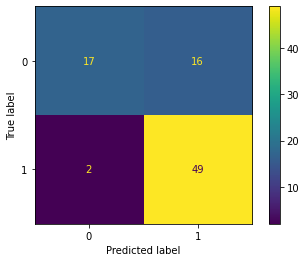

In [31]:
ypred1 = model1.predict(X_test_scaled)
cm = confusion_matrix(y_test,ypred1,labels = model1.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels = model1.classes_)
disp.plot()


In [34]:
tpr = cm[1,1]/(cm[1,0]+cm[1,1])
tnr = cm[0,0]/(cm[0,0]+cm[0,1])

print(tpr,tnr)

0.9607843137254902 0.5151515151515151


**96%** of the data was correctly labelled as **approved**. </br>
Whereas **51%** was correctly labelled as **rejected**. </br>
We will now use CV to imporve on this!

In [35]:
param_grid = [{
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']},
]

optimal_params = GridSearchCV(SVC(),param_grid,cv=5,scoring = 'accuracy')

In [36]:
optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}


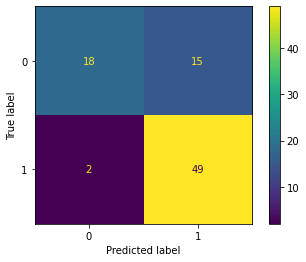

In [37]:
model2 = SVC(C=0.5,gamma=0.01,random_state=42)
model2.fit(X_train_scaled,y_train)

ypred2 = model2.predict(X_test_scaled)
cm = confusion_matrix(y_test,ypred2, labels = model2.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels = model2.classes_)
disp.plot()

We can see that the new model barely improved! Perhaps we need more data!</br>
Nevertheless we will now build and interpret this SVM with help of PCA in the future!
